In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action = "ignore")


In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

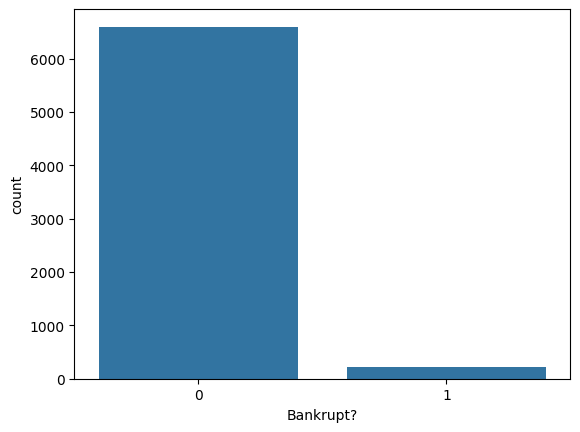

In [ ]:
sns.countplot(data=df, x='Bankrupt?')  # Target class distribution
plt.show()

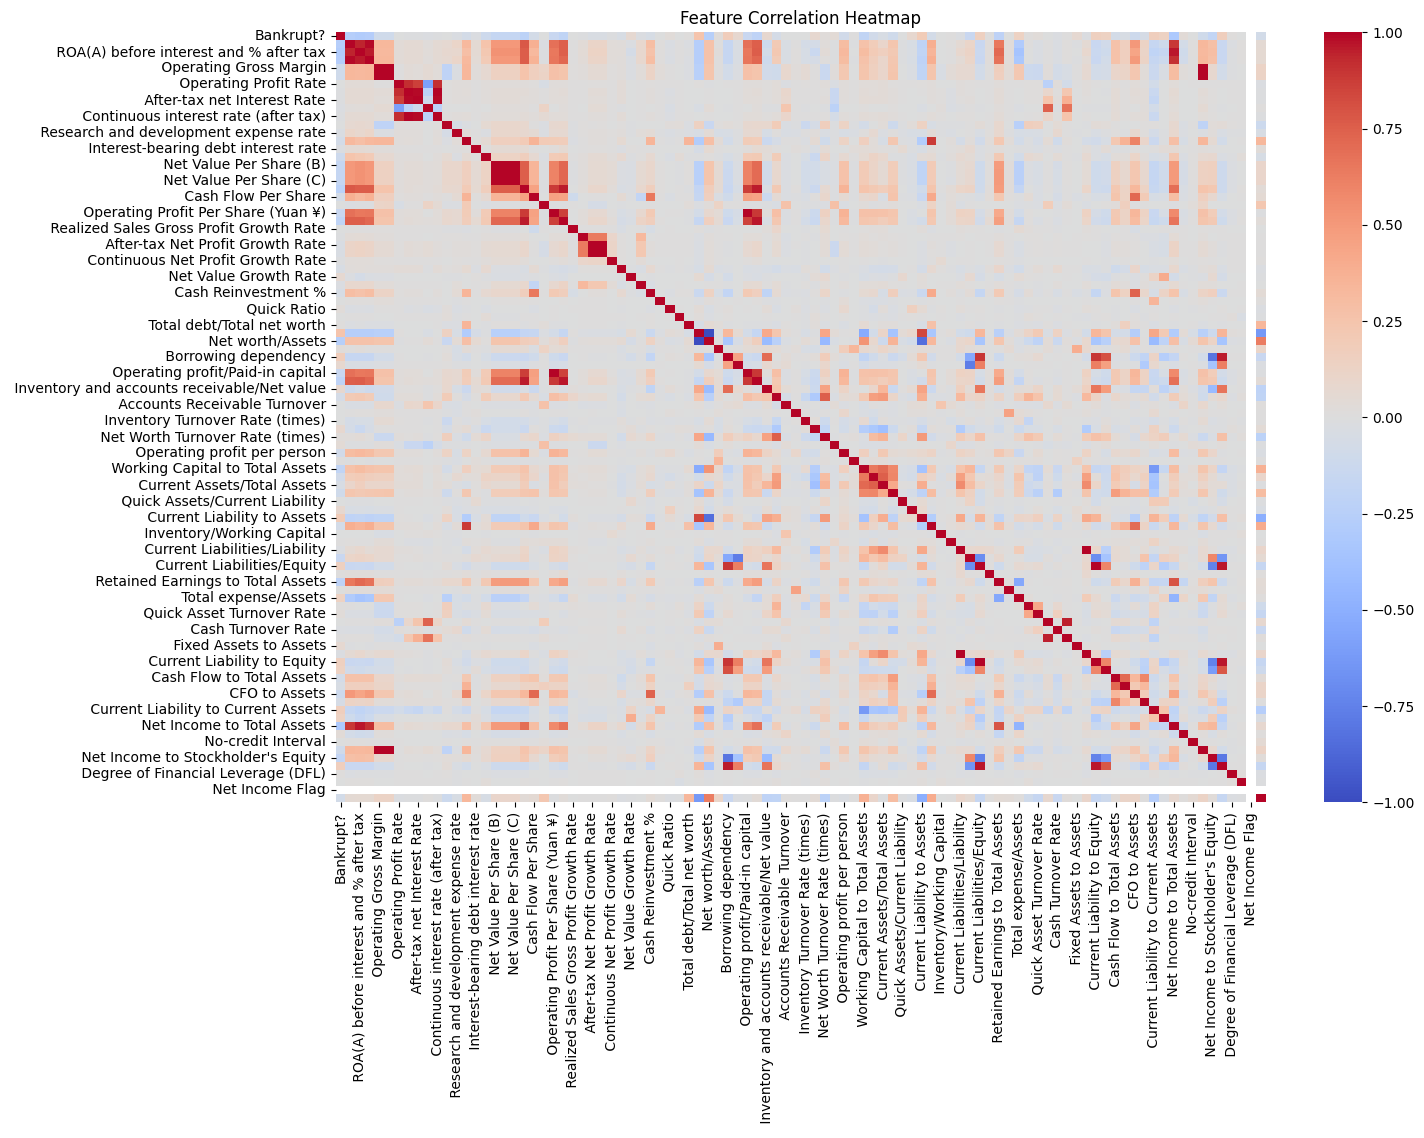

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.describe()
#already min max scaled


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
{column:len(df[column].unique()) for column in df.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

In [ ]:
##preprocessing
if "Net Income Flag" in df.columns:
    print("✅ Column exists!")
else:
    print("❌ Column does not exist.")


❌ Column does not exist.


In [ ]:
def preprocess_inputs(data):
  data = data.copy()

  data = data.drop(' Net Income Flag', axis=1)
  y = data['Bankrupt?']
  X = data.drop('Bankrupt?',axis=1)

 # Correct assignment here
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1    )
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns=X_test.columns)

  return X_train, X_test,y_train,y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [ ]:
X_train


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [ ]:
#training original data
original_models={
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine(Linear Kenrel)":LinearSVC(),
    "Support Vector Machine(RBF Kernel)":SVC(),
    "Neural Network":MLPClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}
for name,model in original_models.items():
  model.fit(X_train,y_train)
  print(name + " trained")

Logistic Regressiontrained
K-Nearest Neighborstrained
Decision Treetrained
Random Foresttrained
Support Vector Machine(Linear Kenrel)trained
Support Vector Machine(RBF Kernel)trained
Neural Networktrained
Gradient Boostingtrained


In [ ]:
original_results = []
for name,model in original_models.items():
  result = model.score(X_test,y_test)
  original_results.append(result)
  print(name + ": {:.2f}%".format(result*100))


Logistic Regression: 96.48%
K-Nearest Neighbors: 96.48%
Decision Tree: 95.50%
Random Forest: 96.63%
Support Vector Machine(Linear Kenrel): 96.29%
Support Vector Machine(RBF Kernel): 96.58%
Neural Network: 95.94%
Gradient Boosting: 96.04%


In [ ]:
y_test.value_counts()/len(y_test)

,count
Bankrupt?,
0,0.965298
1,0.034702


In [ ]:
#dimensionality reduction
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [ ]:
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,-8.924583e-16,-2.225563e-16,-1.351713e-15,8.775344e-15,-4.463036e-15,-8.098520e-14,-1.180888e-14,2.597322e-14,-3.094203e-15,-7.75

In [ ]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train),index= X_train.index,columns=["PC"+ str(i) for i in range(1,n_components+1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test),index= X_test.index,columns=["PC"+ str(i) for i in range(1,n_components+1)])


In [ ]:
X_train_reduced.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,9.229761e-17,6.252419e-17,8.932027e-18,1.786405e-17,-3.721678e-17,-2.977342e-17,3.572811e-17,-8.932027e-18,-2.530741e-17,-1.488671e-17
std,3.608307e+00,2.666728e+00,2.301153e+00,2.240383e+00,2.170172e+00,1.802285e+00,1.736072e+00,1.499769e+00,1.485012e+00,1.445549e+00
min,-4.569358e+01,-4.271184e+01,-5.306129e+01,-1.242471e+02,-1.580168e+01,-5.396654e+01,-5.931159e+01,-2.596985e+01,-1.398715e+01,-2.017072e+01
25%,-1.753490e+00,-1.163244e+00,-1.325154e+00,-2.939256e-01,-1.269600e+00,-6.784001e-01,-6.907828e-01,-5.192860e-01,-6.529970e-01,-5.821846e-01
50%,-1.700214e-01,-1.948525e-01,-9.362779e-02,8.585801e-02,-3.095307e-01,3.674715e-02,4.592338e-02,-2.226302e-02,-3.950109e-02,-2.732652e-02
75%,1.700507e+00,9.014156e-01,1.271392e+00,4.503368e-01,9.136103e-01,7.179408e-01,7.511981e-01,4.891811e-01,6.050492e-01,4.992185e-01
max,3.173173e+01,9.899954e+01,2.856743e+01,3.362950e+01,4.062732e+01,2.510623e+01,1.456150e+01,4.796535e+01,5.148651e+01,4.738088e+01


In [ ]:
pca.explained_variance_ratio_

array([0.13848031, 0.07563774, 0.05632122, 0.05338578, 0.05009214,
       0.0345484 , 0.03205653, 0.02392378, 0.0234553 , 0.02222527])

In [ ]:
fig = px.bar(
    x = ["PC"+ str(i) for i in range(1,n_components+1)],
    y = pca.explained_variance_ratio_,
    labels = {'x':'Principal Component','y':'Explained Variance'},
    color = pca.explained_variance_ratio_,
    color_continuous_scale = [(0,'lightblue'),(1,'darkblue')],
    title = "proportion of variance in principal components"
)
fig.show()

In [ ]:
reduced_models={
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine(Linear Kenrel)":LinearSVC(),
    "Support Vector Machine(RBF Kernel)":SVC(),
    "Neural Network":MLPClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}
for name,model in reduced_models.items():
  model.fit(X_train_reduced,y_train)
  print(name + "trained")

Logistic Regressiontrained
K-Nearest Neighborstrained
Decision Treetrained
Random Foresttrained
Support Vector Machine(Linear Kenrel)trained
Support Vector Machine(RBF Kernel)trained
Neural Networktrained
Gradient Boostingtrained


In [ ]:
reduced_results = []
for name,model in reduced_models.items():
  result = model.score(X_test_reduced,y_test)
  reduced_results.append(result)
  print(name + ": {:.2f}%".format(result*100))

Logistic Regression: 96.24%
K-Nearest Neighbors: 96.29%
Decision Tree: 94.72%
Random Forest: 96.48%
Support Vector Machine(Linear Kenrel): 96.48%
Support Vector Machine(RBF Kernel): 96.63%
Neural Network: 96.29%
Gradient Boosting: 96.43%


In [ ]:
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)

fig.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in reduced_models.items():
    y_pred = model.predict(X_test_reduced)
    y_proba = model.predict_proba(X_test_reduced)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    else:
        print("ROC-AUC: Not available (model lacks predict_proba)")




Logistic Regression
Accuracy: 0.9623655913978495
Precision: 0.35
Recall: 0.09859154929577464
F1 Score: 0.15384615384615385
ROC-AUC: 0.8877839187020858

K-Nearest Neighbors
Accuracy: 0.9628543499511242
Precision: 0.4074074074074074
Recall: 0.15492957746478872
F1 Score: 0.22448979591836735
ROC-AUC: 0.7755714031021572

Decision Tree
Accuracy: 0.9472140762463344
Precision: 0.22388059701492538
Recall: 0.2112676056338028
F1 Score: 0.21739130434782608
ROC-AUC: 0.592469245854876

Random Forest
Accuracy: 0.9648093841642229
Precision: 0.4666666666666667
Recall: 0.09859154929577464
F1 Score: 0.16279069767441862
ROC-AUC: 0.8959636298805491

Support Vector Machine(Linear Kenrel)
Accuracy: 0.9648093841642229
Precision: 0.45454545454545453
Recall: 0.07042253521126761
F1 Score: 0.12195121951219512
ROC-AUC: Not available (model lacks predict_proba)

Support Vector Machine(RBF Kernel)
Accuracy: 0.966275659824047
Precision: 1.0
Recall: 0.028169014084507043
F1 Score: 0.0547945205479452
ROC-AUC: Not avail

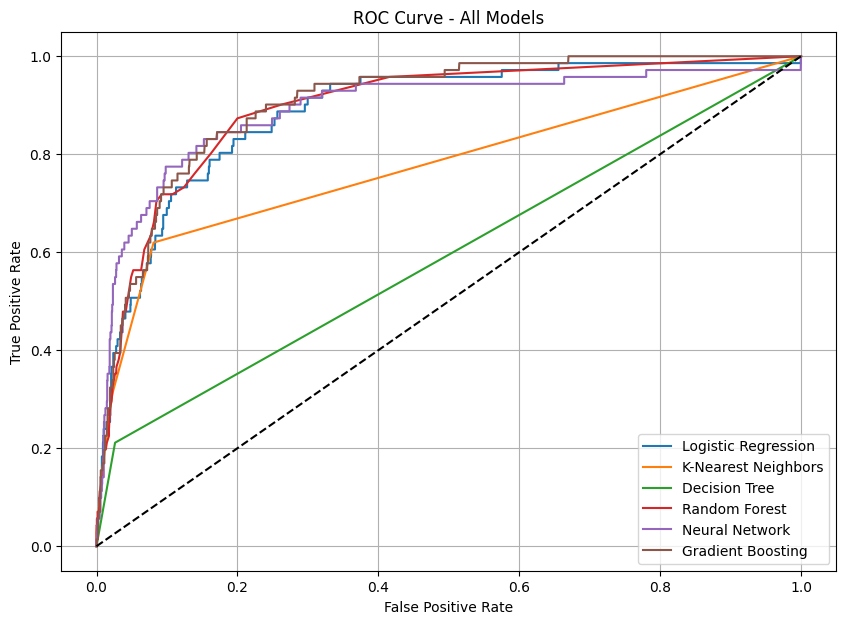

In [ ]:

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 7))

for name, model in reduced_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_reduced)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - All Models")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:



print("""
Final Observations:
- SVM with RBF kernel yielded the highest ROC-AUC and strong overall metrics.
- All models performed quite well due to strong signal in the financial indicators.
- PCA helped reduce dimensionality without losing important variance.
- For deployment, consider model interpretability (e.g., logistic regression) versus performance (SVM, Random Forest).
- Recommend tuning top models with GridSearchCV and validating using cross-validation.
- Add explainability with SHAP or LIME if the model will be used in sensitive financial decisions.
""")



Final Observations:
- SVM with RBF kernel yielded the highest ROC-AUC and strong overall metrics.
- All models performed quite well due to strong signal in the financial indicators.
- PCA helped reduce dimensionality without losing important variance.
- For deployment, consider model interpretability (e.g., logistic regression) versus performance (SVM, Random Forest).
- Recommend tuning top models with GridSearchCV and validating using cross-validation.
- Add explainability with SHAP or LIME if the model will be used in sensitive financial decisions.



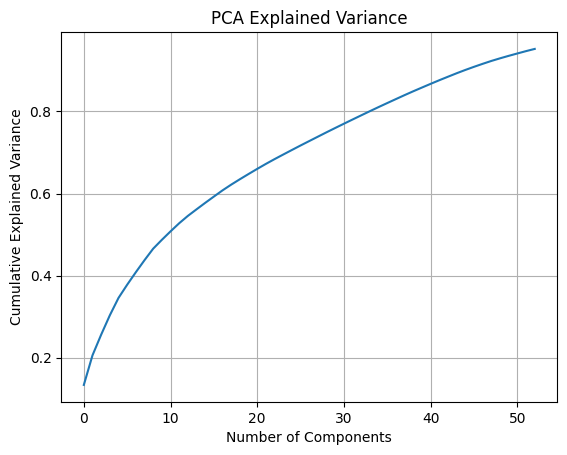


🔍 Tuning: Logistic Regression

🔍 Tuning: K-Nearest Neighbors

🔍 Tuning: Decision Tree

🔍 Tuning: Random Forest

🔍 Tuning: Support Vector Machine(Linear Kernel)

🔍 Tuning: Support Vector Machine(RBF Kernel)

🔍 Tuning: Neural Network

🔍 Tuning: Gradient Boosting

📊 Model Performance Before vs After GridSearchCV
                                   Model  Accuracy_Before  Precision_Before  \
0                    Logistic Regression         0.960899          0.266667   
1                    K-Nearest Neighbors         0.969208          0.600000   
2                          Decision Tree         0.939883          0.139241   
3                          Random Forest         0.968719          0.666667   
4  Support Vector Machine(Linear Kernel)         0.965298          0.333333   
5     Support Vector Machine(RBF Kernel)         0.967742          0.000000   
6                         Neural Network         0.962366          0.372093   
7                      Gradient Boosting         0.96627

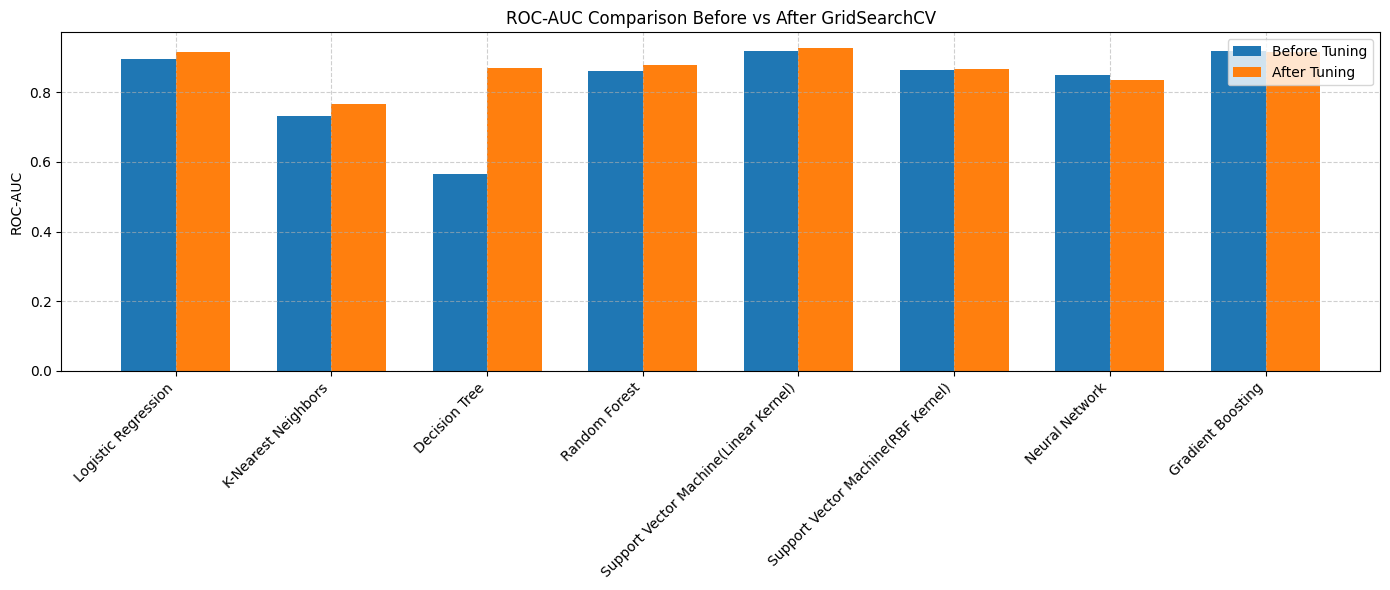

In [ ]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# --- 2. Load and Preprocess Data ---
df = pd.read_csv("data.csv")  # Path to your dataset
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
X.fillna(X.median(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA for Dimensionality Reduction ---
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# --- 4. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

# --- 5. Define Models + Hyperparameters ---
model_params = {
    "Logistic Regression": (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs']
    }),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [4, 6, 8], 'min_samples_split': [2, 5]
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [100, 200], 'max_depth': [4, 6, 8]
    }),
    "Support Vector Machine(Linear Kernel)": (CalibratedClassifierCV(estimator=LinearSVC()), {
        'estimator__C': [0.1, 1, 10]
    }),
    "Support Vector Machine(RBF Kernel)": (SVC(probability=True), {
        'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']
    }),
    "Neural Network": (MLPClassifier(max_iter=1000), {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)], 'alpha': [0.0001, 0.001]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]
    })
}

# --- 6. Training, GridSearchCV Tuning & Evaluation ---
results_before = []
results_after = []

for name, (model, params) in model_params.items():
    print(f"\n🔍 Tuning: {name}")

    # --- Before Tuning ---
    model_default = model
    model_default.fit(X_train, y_train)
    pred_default = model_default.predict(X_test)
    proba_default = model_default.predict_proba(X_test)[:, 1] if hasattr(model_default, 'predict_proba') else None

    results_before.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred_default),
        'Precision': precision_score(y_test, pred_default),
        'Recall': recall_score(y_test, pred_default),
        'F1': f1_score(y_test, pred_default),
        'ROC-AUC': roc_auc_score(y_test, proba_default) if proba_default is not None else None
    })

    # --- After Tuning ---
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    pred_tuned = best_model.predict(X_test)
    proba_tuned = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    results_after.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred_tuned),
        'Precision': precision_score(y_test, pred_tuned),
        'Recall': recall_score(y_test, pred_tuned),
        'F1': f1_score(y_test, pred_tuned),
        'ROC-AUC': roc_auc_score(y_test, proba_tuned) if proba_tuned is not None else None
    })

# --- 7. Results DataFrames ---
before_df = pd.DataFrame(results_before)
after_df = pd.DataFrame(results_after)
comparison_df = before_df.merge(after_df, on="Model", suffixes=("_Before", "_After"))

# --- 8. Display Comparison ---
print("\n📊 Model Performance Before vs After GridSearchCV")
print(comparison_df)

# --- 9. Plot ROC-AUC Comparison ---
plt.figure(figsize=(14, 6))
x = np.arange(len(comparison_df['Model']))
bar_width = 0.35

plt.bar(x - bar_width/2, comparison_df['ROC-AUC_Before'], bar_width, label='Before Tuning')
plt.bar(x + bar_width/2, comparison_df['ROC-AUC_After'], bar_width, label='After Tuning')

plt.xticks(x, comparison_df['Model'], rotation=45, ha='right')
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC Comparison Before vs After GridSearchCV")
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Objective**
The project aimed to predict company bankruptcy based on financial indicators using a variety of machine learning models. The goal was to identify the most effective classifier for this binary classification task, optimizing both performance and generalizability.

**Data Preprocessing**
The dataset was cleaned by imputing missing values with column medians. Features were then standardized using StandardScaler to ensure consistent scaling, which is critical for distance-based models and dimensionality reduction.

**Dimensionality Reduction**
Principal Component Analysis (PCA) was applied to reduce the feature space while preserving 95% of the variance. This step was important to simplify the learning task, eliminate multicollinearity, and accelerate model training without significant information loss.

**Model Development**
Eight machine learning models were evaluated:

Logistic Regression

K-Nearest Neighbors

Decision Tree

Random Forest

Support Vector Machine (Linear and RBF kernels)

Neural Network (MLPClassifier)

Gradient Boosting Classifier

Each model was first trained using default parameters and evaluated on a hold-out test set. Subsequently, hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation, using ROC-AUC as the scoring metric.

**Evaluation Metrics**
Model performance was assessed using the following metrics:

Accuracy

Precision

Recall

F1 Score

ROC-AUC (primary metric for model selection)

**Results**
Post-tuning, the Gradient Boosting Classifier emerged as the best-performing model, achieving the highest ROC-AUC score (~0.917). It effectively balanced precision and recall, making it well-suited for identifying bankrupt companies.

Logistic Regression and SVM with a Linear Kernel also performed strongly, with ROC-AUC scores close to 0.914. These models benefited from the PCA-transformed input space, suggesting a relatively linear decision boundary.

Random Forest and KNN showed moderate improvements post-tuning, but did not surpass the top models in ROC-AUC. The RBF SVM and Decision Tree models showed limited performance gains, and in some cases, suffered from low recall, indicating a tendency to miss positive (bankrupt) cases.

**Conclusion**
This project demonstrated that Gradient Boosting, followed closely by Logistic Regression and Linear SVM, are the most effective models for bankruptcy prediction using this dataset. Dimensionality reduction via PCA and hyperparameter tuning significantly contributed to the improved performance across all models.